* [Train.csv] : https://www.kaggle.com/roshansharma/market-basket-optimization


* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [ ]:
# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

#Part5. [실습5] 마케팅을 위한 연관 규칙 분석

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch04. [실습5] 마케팅을 위한 연관 규칙 분석" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [ ]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import squarify
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from wordcloud import WordCloud

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('/Users/brianna/Downloads/Market_Basket_Optimisation.csv', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 데이터의 모양 알아보기
data.shape

(7501, 20)

In [16]:
# 랜덤 샘플 데이터 보기
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1186,frozen vegetables,tomatoes,parmesan cheese,muffins,spinach,eggs,cake,french fries,champagne,hot dogs,cottage cheese,strawberries,energy drink,fresh bread,candy bars,NaN,NaN,NaN,NaN,NaN
120,pasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6588,tomatoes,parmesan cheese,milk,french wine,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1074,burgers,grated cheese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3856,mineral water,chocolate,black tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,chocolate,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4798,spaghetti,yams,whole wheat rice,cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2249,energy drink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3641,burgers,fresh tuna,spaghetti,energy bar,bacon,eggs,french fries,escalope,pancakes,gluten free bar,light mayo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4964,herb & pepper,red wine,spaghetti,almonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. 데이터 탐색

#### 1) 데이터 타입

In [17]:
# 컬럼별 데이터 타입 알아보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


#### 2) 데이터 통계값

In [18]:
# 컬럼별 간단한 통계값 보기
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


#### 3) 인기 판매 상품 시각화

##### WordCloud

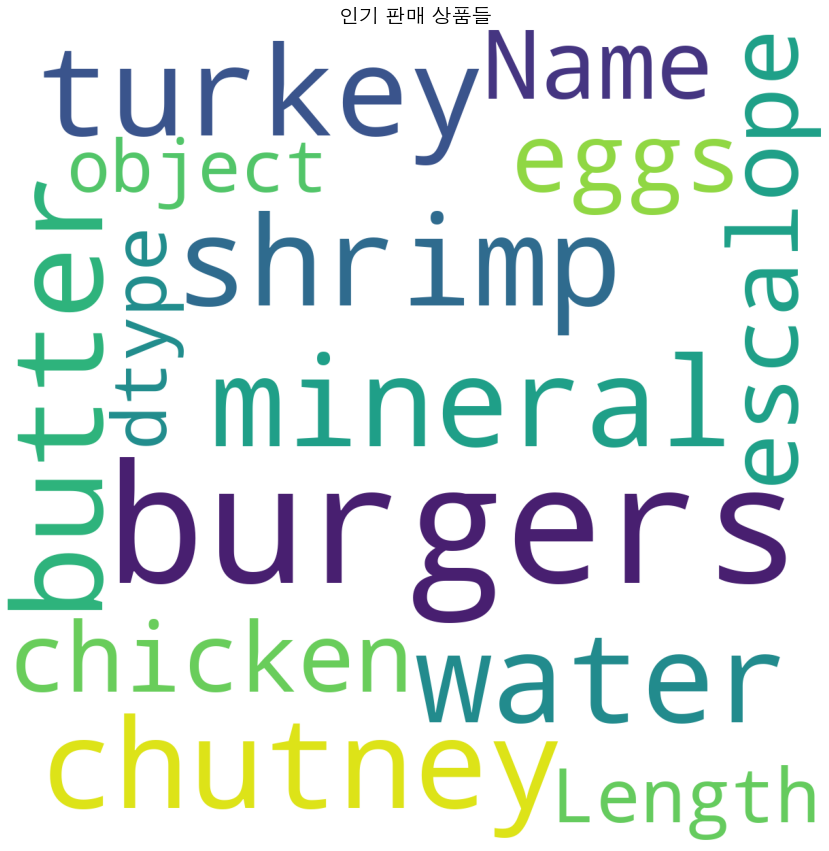

In [19]:
plt.rcParams['figure.figsize'] = (15, 15)
###### 코드 작성 부분 시작 ######

###### 코드 작성 부분 마침 ######
# max_words=121 최대 단어수, .generate(data[0]) string으로 전환한 첫번째 데이터로 만든다
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(str(data[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('인기 판매 상품들',fontsize = 20)
plt.show()

##### 히스토그램

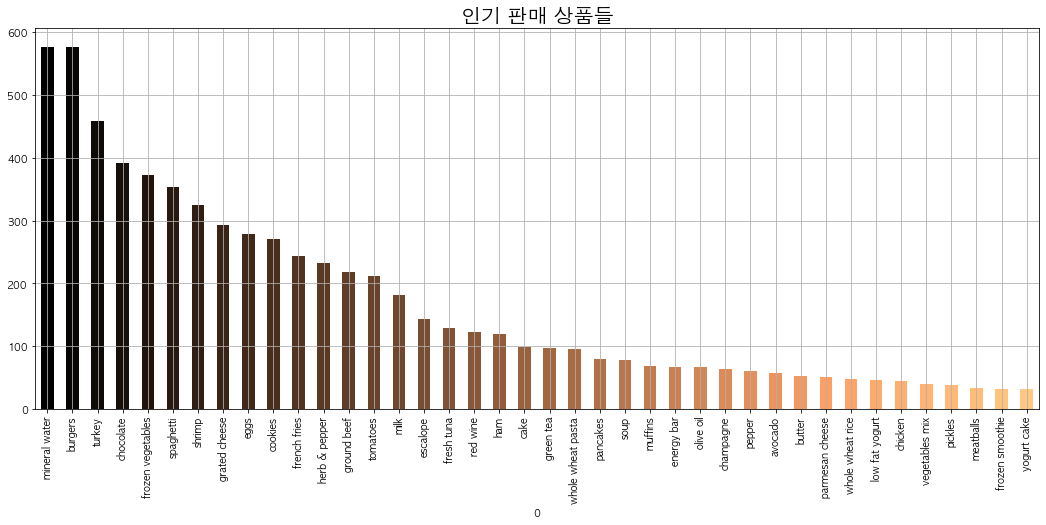

In [22]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
###### 코드 작성 부분 시작 ######
data[0].value_counts().head(40).plot.bar(color=color)
###### 코드 작성 부분 마침 ######
plt.title('인기 판매 상품들', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

##### 트리맵

In [31]:
# 50개 상위 항목들로 frame 만들기
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey',
       'candy bars', 'cereals', 'strawberries', 'yams', 'oil', 'tomato sauce'],
      dtype='object', name=0)

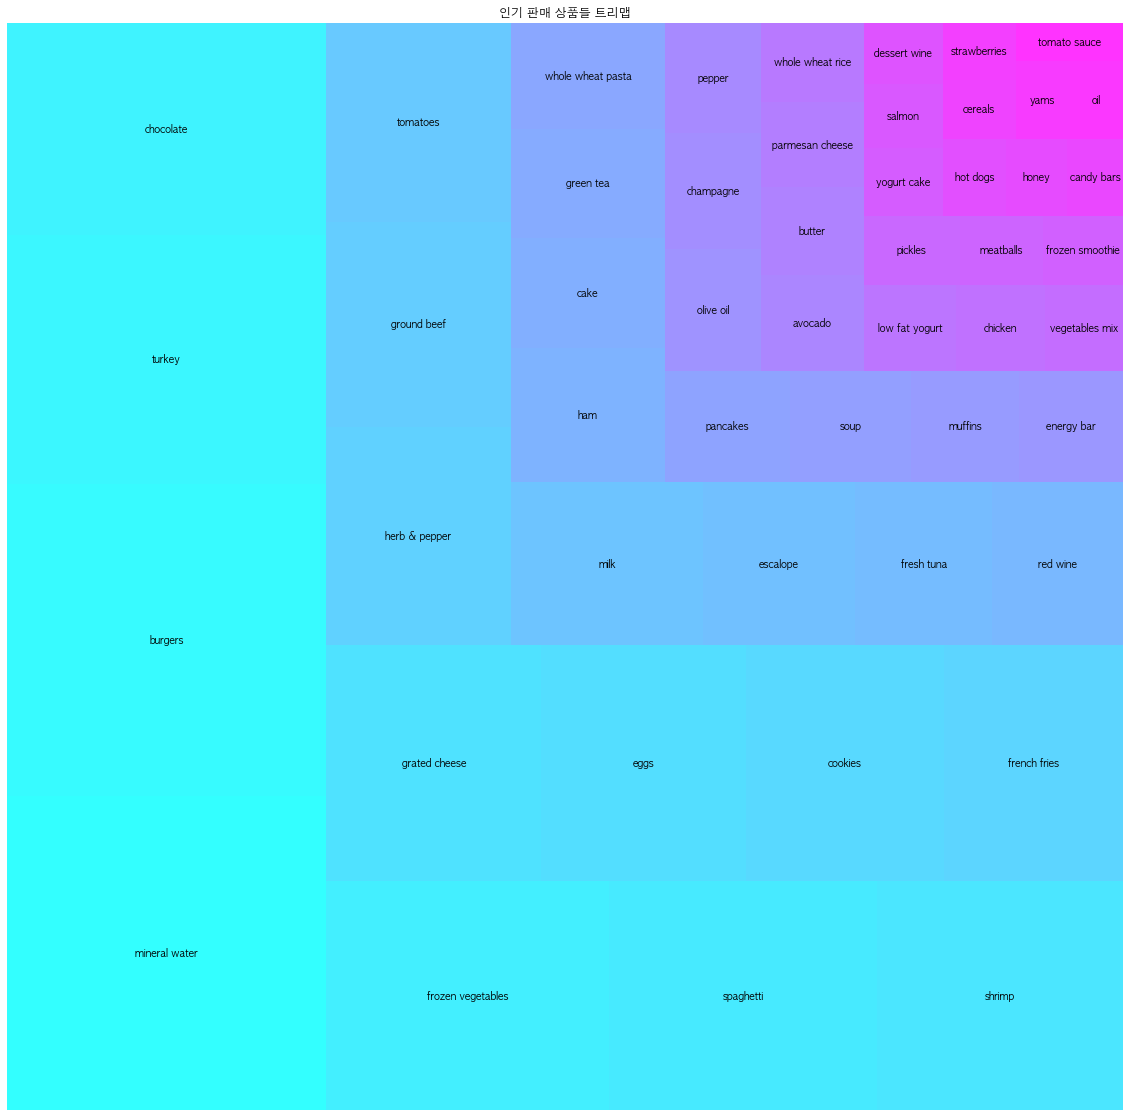

In [33]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
###### 코드 작성 부분 시작 ######
squarify.plot(sizes=y.values, label=y.index, alpha=.8, color=color)
###### 코드 작성 부분 마침 ######
plt.title('인기 판매 상품들 트리맵')
plt.axis('off')
plt.show()

#### 4) 결측값은 원래 null값이 많음

#### 5) 중복값

### 2. 데이터 전처리

#### 1) 데이터 컬럼명 수정

In [34]:
# 동일한 크기의 리스트에 각 손님들의 쇼핑 목록을 넣기
# 데이터 컬럼명이 0,1,2,3,4로 되어있어서 수정해야함
trans = [] # 리스트를 만들어서 각 고객의 쇼핑목록을 하나씩 넣음
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# numpy array 로 변환
trans = np.array(trans)
print(trans.shape)

(7501, 20)


#### 2) Transaction Encoder 적용

In [36]:
from mlxtend.preprocessing import TransactionEncoder
###### 코드 작성 부분 시작 ######
te = TransactionEncoder() # 객체선언
data = te.fit_transform(trans) # 머신러닝 하는것 처럼 fit_transform
data = pd.DataFrame(data, columns = te.columns_)
###### 코드 작성 부분 마침 ######

data.shape

(7501, 121)

In [38]:
data.head()
# 각 항목들이 컬럼으로 들어가고, 121개 항목이 각 transaction에 있는지 없는지 

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


> 기존 컬럼 대상으로 필터링

In [39]:
len(y.index)
# 상위 50개로만 진행

50

In [44]:
data = data[y.index]

## 03. 연관 규칙 분석

* 지지도 (support)
> 항목에 대한 거래수 / 전체 거래수
* 신뢰도 (confidence)
> 조건과 결과 항목을 동시에 포함하는 거래수 / 조건 항목을 포함한 거래수
* 향상도 (lift)
> lift(C,A) = support(C->A) / (support[A] * support[C]) = confidence(C->A) / support(A)
* 예) 거래1 : (A,B,C) / 거래2 : (A,C) / 거래3 : (A,D) / 거래4 : (E,F,G) 일 때,
> lift(C,A) = (2/2)/(3/4) = 1.3333

#### 1) Apriori 알고리즘 적용 절차

##### 1. 모든 거래에서 발생하는 모든 항목에 대한 빈도 테이블을 생성(=transaction encorder)

In [45]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,dessert wine,hot dogs,honey,candy bars,cereals,strawberries,yams,oil,tomato sauce
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### 2. support 가 임의의 값보다 큰 것들로 필터링
##### 3. 중요 항목의 모든 가능한 조합을 만들기

In [49]:
# 최소 지지도 : 0.01, use_colnames=True
###### 코드 작성 부분 시작 ######
# 최소 지지도는 0.01, use_colnames=True > Transaction Encoder 만든걸 활용 하겠음 
frequent_itemsets = apriori(data, min_support=0.01, use_colnames=True)
###### 코드 작성 부분 마침 ######
# support 기준으로 정렬, 내림차순으로
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
0,0.238368,(mineral water)
8,0.179709,(eggs)
5,0.174110,(spaghetti)
10,0.170911,(french fries)
3,0.163845,(chocolate)
...,...,...
135,0.010265,"(spaghetti, red wine)"
106,0.010132,"(chocolate, soup)"
218,0.010132,"(mineral water, ground beef, eggs)"
125,0.010132,"(frozen vegetables, low fat yogurt)"


##### 4. 모든 조합의 발생 횟수 계산

In [50]:
# pandas apply 이용
###### 코드 작성 부분 시작 ######
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x:len(x))
###### 코드 작성 부분 마침 ######
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(mineral water, ground beef, eggs)",3
219,0.013065,"(mineral water, milk, eggs)",3
220,0.011065,"(mineral water, ground beef, milk)",3
221,0.010532,"(spaghetti, eggs, chocolate)",3


In [56]:
# 발생 횟수가 3이고 지지도가 0.01 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
frequent_itemsets[(frequent_itemsets['length'] == 3) &
                 (frequent_itemsets['support'] >= 0.01)]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
206,0.015865,"(spaghetti, mineral water, chocolate)",3
207,0.013465,"(mineral water, chocolate, eggs)",3
208,0.010932,"(mineral water, ground beef, chocolate)",3
209,0.013998,"(mineral water, milk, chocolate)",3
210,0.011998,"(mineral water, frozen vegetables, spaghetti)",3
211,0.011065,"(mineral water, milk, frozen vegetables)",3
212,0.014265,"(mineral water, spaghetti, eggs)",3
213,0.010132,"(mineral water, french fries, spaghetti)",3
214,0.017064,"(mineral water, ground beef, spaghetti)",3
215,0.015731,"(mineral water, milk, spaghetti)",3


In [57]:
# 발생 횟수가 2이고 지지도가 0.01 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
frequent_itemsets[(frequent_itemsets['length'] == 2) &
                 (frequent_itemsets['support'] >= 0.01)]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
47,0.024397,"(mineral water, burgers)",2
48,0.019197,"(mineral water, turkey)",2
49,0.052660,"(mineral water, chocolate)",2
50,0.035729,"(mineral water, frozen vegetables)",2
51,0.059725,"(mineral water, spaghetti)",2
...,...,...,...
201,0.011865,"(pancakes, cake)",2
202,0.016398,"(pancakes, green tea)",2
203,0.011865,"(chicken, green tea)",2
204,0.011199,"(frozen smoothie, green tea)",2


In [58]:
# 발생 횟수가 1이고 지지도가 0.1 이상인 경우 필터링
###### 코드 작성 부분 시작 ######
frequent_itemsets[(frequent_itemsets['length'] == 1) &
                 (frequent_itemsets['support'] >= 0.01)]
###### 코드 작성 부분 마침 ######

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


#### 2) Association Rules 적용

In [60]:
# association_rules 이용, metric 은 confidence, min_threshold=0.1
###### 코드 작성 부분 시작 ######
df_ar = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
###### 코드 작성 부분 마침 ######
df_ar.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
298,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,0.540342
306,"(ground beef, milk)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,0.537969
260,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,0.508837
272,"(milk, frozen vegetables)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,0.503555
30,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,0.503221
...,...,...,...,...,...,...,...,...,...,...
0,(mineral water),(burgers),0.238368,0.087188,0.024397,0.102349,1.173883,0.003614,1.016889,0.194486
236,(milk),(low fat yogurt),0.129583,0.076523,0.013198,0.101852,1.330994,0.003282,1.028201,0.285704
303,(milk),"(mineral water, eggs)",0.129583,0.050927,0.013065,0.100823,1.979774,0.006466,1.055491,0.568568
35,(mineral water),(low fat yogurt),0.238368,0.076523,0.023997,0.100671,1.315565,0.005756,1.026851,0.314943
